# Trajectory Optimization of a Pneumatic Cylinder 


## Mass Modelling

In [1]:
#import libraries
import sympy as sym
import numpy as np
from IPython.display import display

In [3]:
X0 = sym.symbols('X0')   #starting position of the block
m1 = sym.symbols('m1')   #mass of the block

x1 = sym.symbols('x1')                #position of the block
dx1 = sym.symbols('\dot{\\ x}_{1}')    #velocity of the block
ddx1 = sym.symbols('\ddot{\\ x}_{1}')  #acceleration of the block

q = sym.Matrix([x1])
dq = sym.Matrix([dx1])
ddq = sym.Matrix([ddx1])

Xnew = X0 + x1

p1 = sym.Matrix([Xnew, x1])
[dXnew, dx1] = p1.jacobian(q)*dq
display(p1)             # [original position + current position ; current position]

# Just checking
dp1 = sym.Matrix([dXnew, dx1]) # --> derivative of the p1 matrix
display(dp1)

Matrix([
[X0 + x1],
[     x1]])

Matrix([
[\dot{ x}_{1}],
[\dot{ x}_{1}]])

In [4]:
#Define kinetic and potential energies for use in Lagrangian
T = sym.Matrix([0.5*m1*(dXnew**2)])
V = sym.Matrix([0]) 

#Calculate terms of the Lagrangian Equation
Lg1 = sym.zeros(1,len(q))
for i in range(len(q)):
    dT_ddq = sym.diff(T,dq[i]) 
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq 

Lg3 = T.jacobian(q)

Lg4 = V.jacobian(q) 

#apply a horizontal force
F = sym.symbols('F')                  #applied force parameter
FF = sym.Matrix([[F],[0],[0]])        #force matrix
rF = sym.Matrix([[X0 + Xnew],[0],[0]])  #distance the force acts on the block
JF = rF.jacobian(q)
QF = JF.transpose()*FF
#display(QF)

#Equation of motion
EOM = Lg1 - Lg3 + Lg4 - QF 
display(EOM)

Matrix([[-F + 1.0*\ddot{ x}_{1}*m1]])

In [11]:
Nodes = 100
# Implicit Euler Equation
# x[t] = x[t-1] + h*x_dot[t]       

h = 0.01                #used in implicit euler equation for integration approximation 
t = np.arange(0,Nodes*h,h)

Force_array = 10*t           #define force value --> creates an array of forces for what ever value is stipulated 

#intial conditions
x1_0 = 0
dx1_0 = 0

parameter_values = ([X0,x1_0],[m1,1]) # Set parameter values here for the EOM
x1_array = [x1_0]
dx1_array = [dx1_0]

for i in range(1,Nodes):
    # substitute parameter values and previous conditions into the EOM 
    past = [(x1,x1_array[i-1]),(dx1,dx1_array[i-1])]
    forces = [(F,Force_array[i-1])] 
    EOM_sub = EOM.subs(parameter_values).subs(past).subs(forces)
    #isplay(EOM_sub)
    
    acc = sym.solve(EOM_sub,[ddx1])  #solves the acceleration 
    #display(acc)
    
    # integrate for the next velocity and position    
    dx1_array.append(float(dx1_array[i-1]+h*acc[ddx1]))
    x1_array.append(float(x1_array[i-1]+h*dx1_array[i]))

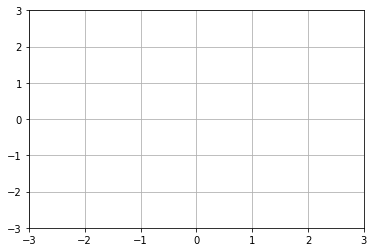

In [12]:
#animate model --> will be able to see what model is doing by viewing in with HTML
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

fig1, ax1 = plt.subplots(1,1)
def plot_block(i,x1_in,ax): #update function for animation
    ax.clear()
    ax.set_xlim([-3,3])
    ax.set_ylim([-3,3])
    
    #plot mass
    m1topx = x1_0    #initial position of mass
    m1bottomx = m1topx + x1_in[i]
    ax.plot([m1bottomx,0],[m1topx,0],color = 'xkcd:red')
  # ax.plot([m1topx,0],color = 'xkcd:red')  #plot initial block
    ax.grid(True)
    
update = lambda i: plot_block(i,x1_array,ax1)      #lambdify just used to calculate the numerical values fast

animate = ani.FuncAnimation(fig1,update,range(Nodes),interval = 50, repeat = True)

#animate.save('PleaseWork.gif', writer = 'ffmpeg')

HTML(animate.to_html5_video()) 